In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import string 
import re
import glob
from pathlib import Path


In [140]:
def load_all_tsv_files(directory_path):
    tsv_files = list(Path(directory_path).glob('*.tsv'))
    if not tsv_files:
        print("No TSV files found in the directory.")
        return None
    dataframes = [pd.read_csv(file, sep="\t") for file in tsv_files]
    return pd.concat(dataframes, axis=0, ignore_index=True) 







In [141]:
path = "/Users/nitinchaube/Studies/College/NLP/Project/CrisisMMD_v2.0/annotations"
crisis_dataset = load_all_tsv_files(path)

In [142]:
#printing shape of the data
print(crisis_dataset.shape)

(18082, 15)


In [143]:
crisis_dataset.describe()

,tweet_id,text_info_conf,image_info_conf,text_human_conf,image_human_conf,image_damage_conf
count,1.808200e+04,18082.000000,18082.000000,18082.000000,18082.000000,3627.000000
mean,9.105572e+17,0.800315,0.856949,0.800315,0.856949,0.789015
std,1.129871e+16,0.200509,0.190975,0.200509,0.190975,0.205992
min,8.699189e+17,0.257800,0.268400,0.257800,0.268400,0.275200
25%,9.069342e+17,0.661400,0.673400,0.661400,0.673400,0.660600
50%,9.101265e+17,0.711900,1.000000,0.711900,1.000000,0.702700
75%,9.160276e+17,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.320276e+17,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
crisis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18082 entries, 0 to 18081
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           18082 non-null  int64  
 1   image_id           18082 non-null  object 
 2   text_info          18082 non-null  object 
 3   text_info_conf     18082 non-null  float64
 4   image_info         18082 non-null  object 
 5   image_info_conf    18082 non-null  float64
 6   text_human         18082 non-null  object 
 7   text_human_conf    18082 non-null  float64
 8   image_human        18082 non-null  object 
 9   image_human_conf   18082 non-null  float64
 10  image_damage       3627 non-null   object 
 11  image_damage_conf  3627 non-null   float64
 12  tweet_text         18082 non-null  object 
 13  image_url          18082 non-null  object 
 14  image_path         18082 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.1+ MB


In [145]:
crisis_dataset.head()

,tweet_id,image_id,text_info,text_info_conf,image_info,image_info_conf,text_human,text_human_conf,image_human,image_human_conf,image_damage,image_damage_conf,tweet_text,image_url,image_path
0,917791044158185473,917791044158185473_0,informative,1.0000,informative,0.6766,other_relevant_information,1.0000,other_relevant_information,0.6766,NaN,NaN,RT @Gizmodo: Wildfires raging through Northern...,http://pbs.twimg.com/media/DLyi_WYVYAApwNg.jpg,data_image/california_wildfires/10_10_2017/917...
1,917791130590183424,917791130590183424_0,informative,1.0000,informative,0.6667,infrastructure_and_utility_damage,1.0000,affected_individuals,0.6667,NaN,NaN,PHOTOS: Deadly wildfires rage in California ht...,http://pbs.twimg.com/media/DLymKm9UMAAu0qw.jpg,data_image/california_wildfires/10_10_2017/917...
2,917791291823591425,917791291823591425_0,informative,0.6813,informative,1.0000,other_relevant_information,0.6813,infrastructure_and_utility_damage,1.0000,severe_damage,1.0,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaaZV4AAjT7x.jpg,data_image/california_wildfires/10_10_2017/917...
3,917791291823591425,917791291823591425_1,informative,0.6813,not_informative,1.0000,other_relevant_information,0.6813,not_humanitarian,1.0000,NaN,NaN,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,http://pbs.twimg.com/media/DLudaZXUMAABAEZ.jpg,data_image/california_wildfires/10_10_2017/917...
4,917792092100988929,917792092100988929_0,informative,0.6727,informative,0.6612,other_relevant_information,0.6727,infrastructure_and_utility_damage,0.6612,severe_damage,1.0,RT @TIME: California's raging wildfires as you...,http://pbs.twimg.com/media/DLwNe-NXUAE0XCw.jpg,data_image/california_wildfires/10_10_2017/917...


In [146]:
crisis_dataset.shape

(18082, 15)

In [147]:
#Checking for duplicates in tweet_id, tweet_text columns
duplicates = crisis_dataset[crisis_dataset.duplicated(subset='tweet_id', keep=False)]
print(duplicates[['tweet_id', 'tweet_text']].sort_values(by='tweet_text').reset_index(drop=True))


                tweet_id                                         tweet_text
0     904473410792816641  #19 &amp; #20 serving the people and saving th...
1     904473410792816641  #19 &amp; #20 serving the people and saving th...
2     904469110028951552  #AlleyTheatre sustains heavy damage from #Hurr...
3     904469110028951552  #AlleyTheatre sustains heavy damage from #Hurr...
4     907621182538764289  #Arkansas #Soldiers #TaskForceAleutian assist ...
...                  ...                                                ...
3164  910042181741793281  ‚úàÔ∏è·ºû8·ºüA·º≥4 Hope #Cuba will soon recove...
3165  910042181741793281  ‚úàÔ∏è·ºû8·ºüA·º≥4 Hope #Cuba will soon recove...
3166  910042181741793281  ‚úàÔ∏è·ºû8·ºüA·º≥4 Hope #Cuba will soon recove...
3167  909827685874110465  ❤️ getting a thank U card from a community mem...
3168  909827685874110465  ❤️ getting a thank U card from a community mem...

[3169 rows x 2 columns]


In [148]:
#Removing duplicates
crisis_dataset = crisis_dataset.drop_duplicates(subset=['tweet_id'])
crisis_dataset.shape

(16058, 15)

In [149]:
#Considering only the tweet_text, text_info, text_human columns as there rare relevent columns for our project
crisis_dataset = crisis_dataset[["tweet_text","text_info","text_human"]]
crisis_dataset.head()

,tweet_text,text_info,text_human
0,RT @Gizmodo: Wildfires raging through Northern...,informative,other_relevant_information
1,PHOTOS: Deadly wildfires rage in California ht...,informative,infrastructure_and_utility_damage
2,RT @Cal_OES: PLS SHARE: Weâ€™re capturing wild...,informative,other_relevant_information
4,RT @TIME: California's raging wildfires as you...,informative,other_relevant_information
5,Wildfires Threaten Californiaâ€™s First Legal ...,informative,other_relevant_information


# Phase1: EDA And Feature Engineering

In [150]:
crisis_dataset.describe()


,tweet_text,text_info,text_human
count,16058,16058,16058
unique,16058,2,8
top,RT @Gizmodo: Wildfires raging through Northern...,informative,other_relevant_information
freq,1,11503,5951


In [151]:
#checking for null values
def check_null(df):
    return df.isnull().sum()
check_null(crisis_dataset)

tweet_text    0
text_info     0
text_human    0
dtype: int64

In [152]:
#checking unique values in text_info and text_human columns
def checking_unique(df):
    print(df["text_info"].unique())
    print(df["text_human"].unique())

checking_unique(crisis_dataset)

['informative' 'not_informative']
['other_relevant_information' 'infrastructure_and_utility_damage'
 'injured_or_dead_people' 'not_humanitarian' 'missing_or_found_people'
 'rescue_volunteering_or_donation_effort' 'affected_individuals'
 'vehicle_damage']


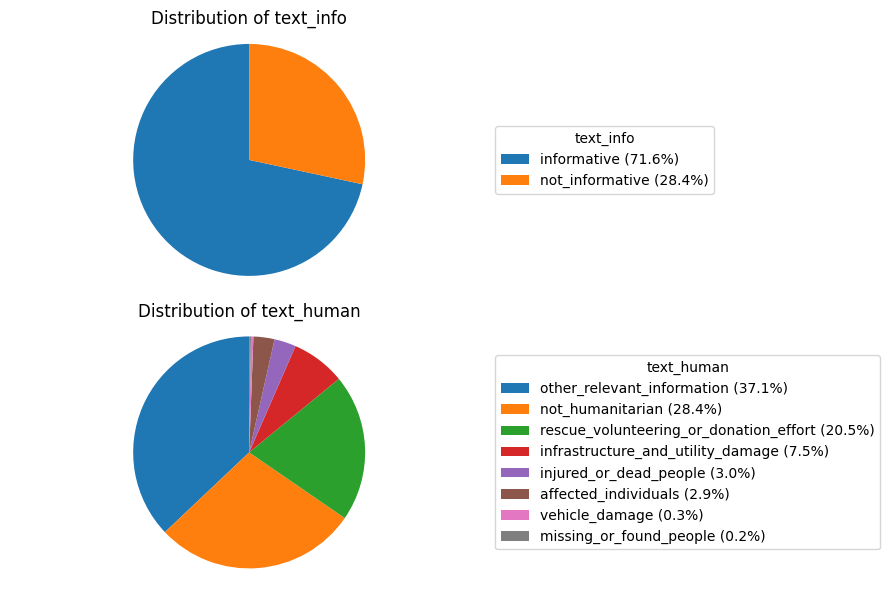

In [153]:
# plotting pie chart of number of unique values in text_info and text_human columns
def pi_chart(df):
    fig, axs = plt.subplots(2,1 , figsize=(9,6))

    # First pie chart - text_info
    values1 = df["text_info"].value_counts()
    total1 = values1.sum()
    wedges1, _ = axs[0].pie(values1, startangle=90)
    legend_labels1 = [f"{label} ({(count/total1)*100:.1f}%)" for label, count in values1.items()]
    axs[0].legend(wedges1, legend_labels1, title="text_info", bbox_to_anchor=(1, 0.5), loc="center left")
    axs[0].set_title("Distribution of text_info")
    axs[0].axis('equal')

    # Second pie chart - text_human
    values2 = df["text_human"].value_counts()
    total2 = values2.sum()
    wedges2, _ = axs[1].pie(values2, startangle=90)
    legend_labels2 = [f"{label} ({(count/total2)*100:.1f}%)" for label, count in values2.items()]
    axs[1].legend(wedges2, legend_labels2, title="text_human", bbox_to_anchor=(1, 0.5), loc="center left")
    axs[1].set_title("Distribution of text_human")
    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

pi_chart(crisis_dataset)


In [154]:
#lets see the max and min token count in tweet_text column
def max_token_count(df):
    max_token_count = df["tweet_text"].apply(lambda x: len(x.split()))
    return max_token_count.max()

def min_token_count(df):
    min_token_count = df["tweet_text"].apply(lambda x: len(x.split()))
    return min_token_count.min()

def avg_token_count(df):
    avg_token_count = df["tweet_text"].apply(lambda x: len(x.split())).mean().round(0)
    return avg_token_count

print("Max token in tweet_text column is: ", max_token_count(crisis_dataset))
print("Min token in tweet_text column is: ", min_token_count(crisis_dataset))
print("Average token in tweet_text column is: ", avg_token_count(crisis_dataset))

Max token in tweet_text column is:  26
Min token in tweet_text column is:  3
Average token in tweet_text column is:  14.0


In [160]:
#Cleaning the tweet_text column
import re
import html
def cleaning_tweet_text(tweet):
    # unescape html entities like &amp;
    tweet_text = html.unescape(tweet)
    #lower case the tweet_text
    tweet_text = tweet_text.lower()
    #Remove "RT @user:"" and "via @user"
    tweet_text = re.sub(r'^RT\s+@\w+:\s+','',tweet_text)
    tweet_text = re.sub(r'via\s+@\w+','', tweet_text)
    #Replace URL with <url>
    tweet_text = re.sub(r'https?://\S+','<url>', tweet_text)
    #Replace mentions with <user>
    tweet_text = re.sub(r'@\w+','<user>', tweet_text)
    #Removing extra spaces
    tweet_text = re.sub(r'\s+',' ', tweet_text).strip()

    return tweet_text


In [161]:
#Applying the cleaning function to tweet_text column
crisis_dataset['tweet_text'] = crisis_dataset['tweet_text'].apply(cleaning_tweet_text)
crisis_dataset.head()

,tweet_text,text_info,text_human,text_info_label,text_human_label
0,wildfires raging through northern california a...,informative,other_relevant_information,0,5
1,photos: deadly wildfires rage in california <u...,informative,infrastructure_and_utility_damage,0,1
2,pls share: weâ€™re capturing wildfire response...,informative,other_relevant_information,0,5
4,california's raging wildfires as you've never ...,informative,other_relevant_information,0,5
5,wildfires threaten californiaâ€™s first legal ...,informative,other_relevant_information,0,5


In [162]:
print(crisis_dataset.tweet_text.iloc[2])

pls share: weâ€™re capturing wildfire response, recovery info here: <url> <url>


In [163]:
# Using LabelEncoder to encode lables.
from sklearn.preprocessing import LabelEncoder
def encode_labels(df, column_name, new_column_name):
    le = LabelEncoder()
    df[new_column_name] = le.fit_transform(df[column_name])
    return df, le

crisis_dataset , le_binary = encode_labels(crisis_dataset, 'text_info', 'text_info_label')
crisis_dataset , le_multiclass= encode_labels(crisis_dataset, 'text_human', 'text_human_label')
print(dict(zip(le_binary.classes_, le_binary.transform(le_binary.classes_))))
print(dict(zip(le_multiclass.classes_, le_multiclass.transform(le_multiclass.classes_))))




{'informative': 0, 'not_informative': 1}
{'affected_individuals': 0, 'infrastructure_and_utility_damage': 1, 'injured_or_dead_people': 2, 'missing_or_found_people': 3, 'not_humanitarian': 4, 'other_relevant_information': 5, 'rescue_volunteering_or_donation_effort': 6, 'vehicle_damage': 7}


In [164]:
crisis_dataset.head()

,tweet_text,text_info,text_human,text_info_label,text_human_label
0,wildfires raging through northern california a...,informative,other_relevant_information,0,5
1,photos: deadly wildfires rage in california <u...,informative,infrastructure_and_utility_damage,0,1
2,pls share: weâ€™re capturing wildfire response...,informative,other_relevant_information,0,5
4,california's raging wildfires as you've never ...,informative,other_relevant_information,0,5
5,wildfires threaten californiaâ€™s first legal ...,informative,other_relevant_information,0,5


## Building BERT - uncased model




In [174]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, classification_report


In [169]:
#splitting the data into train, val and test
train_df, test_df = train_test_split(crisis_dataset, test_size=0.25, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)
print(train_df.shape, val_df.shape, test_df.shape)


(12043, 5) (2008, 5) (2007, 5)


In [172]:
#Tokenizer
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#function to tokenize the tweet_text
def tokenize_data(df, max_len=128):
    return tokenizer(
        list(df["tweet_text"]),
        padding="max_length",
        truncation=True,
        max_length = max_len,
        return_tensors="pt"
    )

class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels.tolist())
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            "labels": self.labels[idx]
        }

In [173]:
#Encoding train, val
train_enc_bin = tokenize_data(train_df)
val_enc_bin = tokenize_data(val_df)
test_enc_bin = tokenize_data(test_df)

train_dataset_bin = TweetDataset(train_enc_bin, train_df["text_info_label"])
val_dataset_bin = TweetDataset(val_enc_bin, val_df["text_info_label"])
test_dataset_bin = TweetDataset(test_enc_bin, test_df["text_info_label"])

#Model
model_bin = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [175]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="macro")
    }


In [184]:
import os
def train_or_resume_model(train_encodings, train_labels, val_encodings, val_labels, save_path, tokenizer, num_labels, epochs=5, batch_size=16):
    os.makedirs(save_path, exist_ok=True)
    train_dataset = TweetDataset(train_encodings, train_labels)
    val_dataset = TweetDataset(val_encodings, val_labels)
    
    if os.path.exists(os.path.join(save_path, "*.bin")):
        print(f"Loading existing model from: {save_path}")
        model = BertForSequenceClassification.from_pretrained(save_path)
    else:
        print(f"No model fount at {save_path}, initializing fresh BERT model.")
        model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
    
    #setting up training arguments
    training_args = TrainingArguments(
        output_dir=save_path,
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size * 2,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=2,
        learning_rate=2e-5,
        weight_decay=0.01,
        warmup_steps=100,
        logging_dir=os.path.join(save_path, "logs"),
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        
    )

    #making trainer
    trainer = Trainer(
        model = model, 
        args = training_args,
        train_dataset = train_dataset,
        eval_dataset = val_dataset,
        tokenizer = tokenizer,
        compute_metrics = compute_metrics,
        callbacks = [EarlyStoppingCallback(early_stopping_patience=2)]
    )

    #checki if there is a last checkpoint 
    checkpoint_path = list(Path(save_path).glob("checkpoint-*"))

    if checkpoint_path:
        trainer.train(resume_from_checkpoint=checkpoint_path[-1])
    else:
        trainer.train()

    trainer.save_model(save_path)
    tokenizer.save_pretrained(save_path)

    return trainer, model
    

In [185]:
#Training Binary Model
save_path_bin = "./models/binary_model"
trainer_bin, model_bin = train_or_resume_model(train_enc_bin, train_df["text_info_label"], val_enc_bin, val_df["text_info_label"], save_path_bin, tokenizer, 2)

No model fount at ./models/binary_model, initializing fresh BERT model.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/j7/ytxcvpvj7sg85_k31gzfzg5c0000gn/T/ipykernel_59774/3773756154.py:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


In [188]:
#Testing the binary model
test_dataset_bin = TweetDataset(test_enc_bin, test_df["text_info_label"])
test_labels_bin = test_df["text_info_label"]
import torch
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

#loading the model
binary_model = BertForSequenceClassification.from_pretrained(save_path_bin)
binary_model.to(device)
trainer_bin.model = binary_model

predictions_bin = trainer_bin.predict(test_dataset_bin)
preds_bin = predictions_bin.predictions.argmax(-1)

print(classification_report(test_df["text_info_label"], preds_bin))




              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1457
           1       0.81      0.65      0.72       550

    accuracy                           0.86      2007
   macro avg       0.84      0.80      0.81      2007
weighted avg       0.86      0.86      0.86      2007



In [196]:
def classify_tweets(tweet, model_path="./models/binary_model"):
    tokenizer = BertTokenizer.from_pretrained(model_path)
    model = BertForSequenceClassification.from_pretrained(model_path)
    device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    #tokenize input
    inputs = tokenizer(tweet, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1).item()

    label_map = {1: "non-informative", 0: "informative"}
    return label_map[pred]



In [198]:
tweet = "Film is not doing good in box office"
result = classify_tweets(tweet)
print(f"The tweet is classified as: {result}")


The tweet is classified as: non-informative
